In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
from collections import Counter

# NLP libraries
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from textblob import TextBlob
import spacy

In [2]:
# Load twentieth-century text file
with open("key_events_20th_century.txt", "r", encoding="utf-8", errors="ignore") as file:
    text_data = file.read()

In [3]:
print("Text file loaded successfully")
print("Number of characters:", len(text_data))

Text file loaded successfully
Number of characters: 115091


In [4]:
text_data[:1000]

'Key events of the 20th century - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide (Top) 1 Historic events in the 20th century Toggle Historic events in the 20th century subsection 1.1 World at the beginning of the century 1.1.1 "The war to end all wars": World War I (1914–1918) 1.2 Spanish flu 1.2.1 Russian Revolution and communism 1.3 Between the wars 1.3.1 Economic depression 1.3.2 The rise of dictatorship 1.4 Global war: World War II (1939–1945) 1.4.1 The war in Europe 1.4.2 Blitzkrieg 1.4.3 Operation Barbarossa 1.4.4 Turning tides 1.4.5 Operation Overlord 1.4.6 Final days 1.4.7 The war in the Pacific 1.4.7.1 Background 1.4.8 Japanese Expansion 1.4.9 Allied offensive

In [5]:
import nltk
nltk.download("punkt_tab")
nltk.download("punkt")   # also install standard punkt (safe)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nikik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Tokenize words
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(text_data)

In [7]:
print("Total tokens:", len(sent_tokens))
print(sent_tokens[:20])

Total tokens: 1644
['Key events of the 20th century - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide (Top) 1 Historic events in the 20th century Toggle Historic events in the 20th century subsection 1.1 World at the beginning of the century 1.1.1 "The war to end all wars": World War I (1914–1918) 1.2 Spanish flu 1.2.1 Russian Revolution and communism 1.3 Between the wars 1.3.1 Economic depression 1.3.2 The rise of dictatorship 1.4 Global war: World War II (1939–1945) 1.4.1 The war in Europe 1.4.2 Blitzkrieg 1.4.3 Operation Barbarossa 1.4.4 Turning tides 1.4.5 Operation Overlord 1.4.6 Final days 1.4.7 The war in the Pacific 1.4.7.1 Background 1.4.8 Japanese Expansion 1.

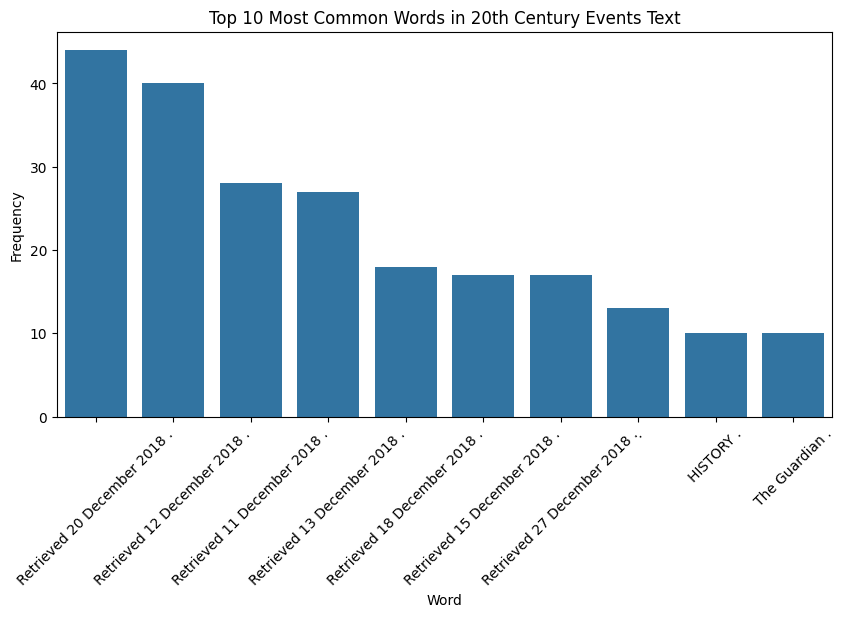

In [8]:
from nltk.probability import FreqDist

freq_dist = FreqDist(sent_tokens)
top_10_words = freq_dist.most_common(10)

df_top10 = pd.DataFrame(top_10_words, columns=["Word", "Frequency"])

plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Frequency", data=df_top10)
plt.title("Top 10 Most Common Words in 20th Century Events Text")
plt.xticks(rotation=45)
plt.show()

In [9]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

print(list(stop_words)[:20])

['wouldn', 'is', 'what', "couldn't", 'few', 'should', 'yours', 'there', "that'll", 'shouldn', "she'd", 'down', 'each', "needn't", 'doing', "mustn't", 'under', 'it', "you're", 'does']


In [10]:
filtered_words = [word for word in sent_tokens if word.lower() not in stop_words]

print("Before:", len(sent_tokens))
print("After stopword removal:", len(filtered_words))
print(filtered_words[:20])

Before: 1644
After stopword removal: 1644
['Key events of the 20th century - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide (Top) 1 Historic events in the 20th century Toggle Historic events in the 20th century subsection 1.1 World at the beginning of the century 1.1.1 "The war to end all wars": World War I (1914–1918) 1.2 Spanish flu 1.2.1 Russian Revolution and communism 1.3 Between the wars 1.3.1 Economic depression 1.3.2 The rise of dictatorship 1.4 Global war: World War II (1939–1945) 1.4.1 The war in Europe 1.4.2 Blitzkrieg 1.4.3 Operation Barbarossa 1.4.4 Turning tides 1.4.5 Operation Overlord 1.4.6 Final days 1.4.7 The war in the Pacific 1.4.7.1 Background 1.4.

In [11]:
filtered_words = [
    re.sub(r"[^a-zA-Z]", "", word) 
    for word in filtered_words
]

# Remove empty strings
filtered_words = [word for word in filtered_words if word != ""]

print(filtered_words[:20])

['KeyeventsofthethcenturyWikipediaJumptocontentMainmenuMainmenumovetosidebarhideNavigationMainpageContentsCurrenteventsRandomarticleAboutWikipediaContactusContributeHelpLearntoeditCommunityportalRecentchangesUploadfileSpecialpagesSearchSearchAppearanceDonateCreateaccountLoginPersonaltoolsDonateCreateaccountLoginContentsmovetosidebarhideTopHistoriceventsinthethcenturyToggleHistoriceventsinthethcenturysubsectionWorldatthebeginningofthecenturyThewartoendallwarsWorldWarISpanishfluRussianRevolutionandcommunismBetweenthewarsEconomicdepressionTheriseofdictatorshipGlobalwarWorldWarIIThewarinEuropeBlitzkriegOperationBarbarossaTurningtidesOperationOverlordFinaldaysThewarinthePacificBackgroundJapaneseExpansionAlliedoffensiveFinaldaysTheHolocaustTheNuclearAgebeginsThepostwarworldTheendofempiresdecolonizationTheColdWarWarbyproxyThespaceraceTheendoftheColdWarInformationandcommunicationstechnologyTheworldattheendofthecenturySeealsoReferencesSourcesExternallinksTogglethetableofcontentsKeyeventsoftheth

In [12]:
from nltk.probability import FreqDist

freq_dist_clean = FreqDist(filtered_words)
freq_dist_clean

FreqDist({'RetrievedDecember': 205, 'ISBN': 40, 'ISSN': 30, 'p': 18, 'June': 11, 'HISTORY': 10, 'BBC': 10, 'TheGuardian': 10, 'ArchivedfromtheoriginalonDecember': 9, 'ImperialWarMuseums': 8, ...})

In [13]:
top_10_clean = freq_dist_clean.most_common(10)

df_top10_clean = pd.DataFrame(top_10_clean, columns=["Word", "Frequency"])
df_top10_clean

,Word,Frequency
0,RetrievedDecember,205
1,ISBN,40
2,ISSN,30
3,p,18
4,June,11
5,HISTORY,10
6,BBC,10
7,TheGuardian,10
8,ArchivedfromtheoriginalonDecember,9
9,ImperialWarMuseums,8


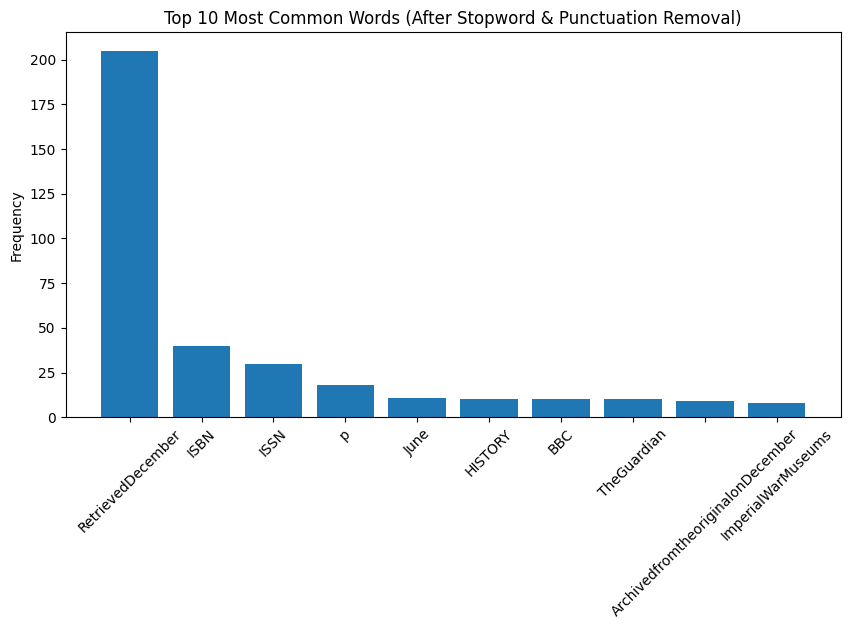

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(df_top10_clean["Word"], df_top10_clean["Frequency"])
plt.title("Top 10 Most Common Words (After Stopword & Punctuation Removal)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

# Task 5 – Stop Word and Punctuation Removal
After removing stop words and punctuation, the most common words in the text changed significantly.
Instead of generic English words such as “the” and “of,” the plot now highlights more meaningful terms related to historical events, locations, and themes of the twentieth century.
This demonstrates how text preprocessing improves interpretability by allowing the analysis to focus on informative content rather than grammatical filler words.

In [15]:
clean_text = " ".join(filtered_words)

In [16]:
blob = TextBlob(clean_text)

In [17]:
tags_list = blob.tags

In [18]:
tags_list[:20]

[('KeyeventsofthethcenturyWikipediaJumptocontentMainmenuMainmenumovetosidebarhideNavigationMainpageContentsCurrenteventsRandomarticleAboutWikipediaContactusContributeHelpLearntoeditCommunityportalRecentchangesUploadfileSpecialpagesSearchSearchAppearanceDonateCreateaccountLoginPersonaltoolsDonateCreateaccountLoginContentsmovetosidebarhideTopHistoriceventsinthethcenturyToggleHistoriceventsinthethcenturysubsectionWorldatthebeginningofthecenturyThewartoendallwarsWorldWarISpanishfluRussianRevolutionandcommunismBetweenthewarsEconomicdepressionTheriseofdictatorshipGlobalwarWorldWarIIThewarinEuropeBlitzkriegOperationBarbarossaTurningtidesOperationOverlordFinaldaysThewarinthePacificBackgroundJapaneseExpansionAlliedoffensiveFinaldaysTheHolocaustTheNuclearAgebeginsThepostwarworldTheendofempiresdecolonizationTheColdWarWarbyproxyThespaceraceTheendoftheColdWarInformationandcommunicationstechnologyTheworldattheendofthecenturySeealsoReferencesSourcesExternallinksTogglethetableofcontentsKeyeventsofthet

In [19]:
df_tags = pd.DataFrame(tags_list, columns=["Word", "POS_Tag"])

In [20]:
df_tags.head()

,Word,POS_Tag
0,KeyeventsofthethcenturyWikipediaJumptocontentM...,NNS
1,TheWorldWarssparkedtensionbetweencountriesandl...,VBN
2,Theseadvancementshaveplayedasignificantroleinc...,NNP
3,HistoriceventsinthethcenturyeditWorldatthebegi...,NNP
4,Thessawthedecadeheraldaseriesofinventionsinclu...,NNP


In [21]:
df_tags = pd.DataFrame(tags_list, columns=["Word", "POS_Tag"])

In [22]:
df_tags.head()

,Word,POS_Tag
0,KeyeventsofthethcenturyWikipediaJumptocontentM...,NNS
1,TheWorldWarssparkedtensionbetweencountriesandl...,VBN
2,Theseadvancementshaveplayedasignificantroleinc...,NNP
3,HistoriceventsinthethcenturyeditWorldatthebegi...,NNP
4,Thessawthedecadeheraldaseriesofinventionsinclu...,NNP


In [23]:
pos_counts = (df_tags.groupby("POS_Tag") .count().reset_index().rename(columns={"Word": "Frequency"}))

In [24]:
pos_counts

,POS_Tag,Frequency
0,FW,1
1,IN,1
2,JJ,8
3,NN,49
4,NNP,1507
5,NNPS,3
6,NNS,1
7,RB,2
8,VBD,19
9,VBN,2


In [25]:
top_10_pos = pos_counts.sort_values(
    by="Frequency", ascending=False
).head(10)

top_10_pos

,POS_Tag,Frequency
4,NNP,1507
3,NN,49
8,VBD,19
10,VBZ,17
2,JJ,8
5,NNPS,3
7,RB,2
9,VBN,2
0,FW,1
1,IN,1


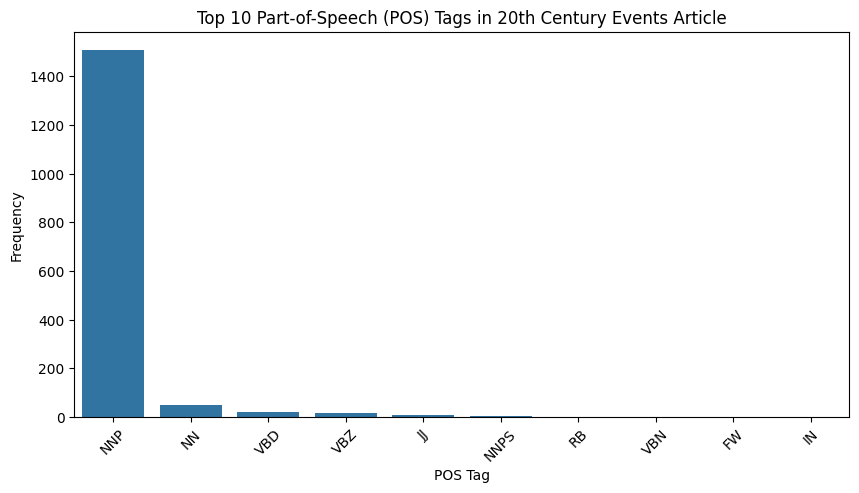

In [26]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="POS_Tag",
    y="Frequency",
    data=top_10_pos
)

plt.title("Top 10 Part-of-Speech (POS) Tags in 20th Century Events Article")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.show()

In [27]:
noun_tags = ["NN", "NNS", "NNP"]
verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
adj_tags = ["JJ", "JJR", "JJS"]

In [28]:
df_nouns = df_tags[df_tags["POS_Tag"].isin(noun_tags)]

top_15_nouns = (
    df_nouns.groupby("Word")
    .count()
    .reset_index()
    .rename(columns={"POS_Tag": "Frequency"})
    .sort_values(by="Frequency", ascending=False)
    .head(15)
)

top_15_nouns

,Word,Frequency
647,RetrievedDecember,205
369,ISBN,40
370,ISSN,30
1108,p,16
438,June,11
290,HISTORY,10
80,BBC,10
778,TheGuardian,9
48,ArchivedfromtheoriginalonDecember,9
373,ImperialWarMuseums,8


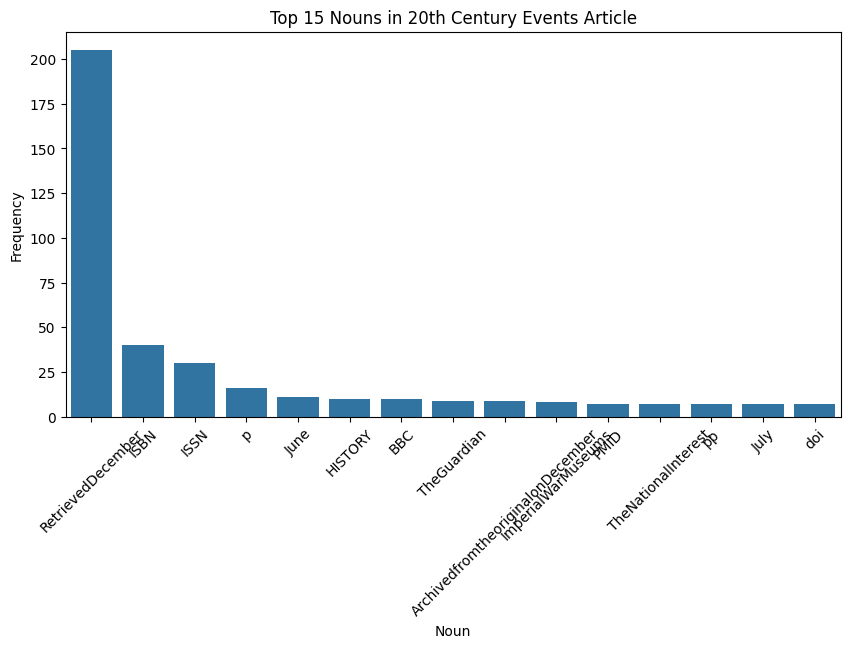

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Word",
    y="Frequency",
    data=top_15_nouns
)
plt.title("Top 15 Nouns in 20th Century Events Article")
plt.xticks(rotation=45)
plt.xlabel("Noun")
plt.ylabel("Frequency")
plt.show()

# Top Nouns

The noun frequency plot shows a very strong dominance of dates and temporal markers, particularly “December”, which appears far more frequently than any other noun. This suggests that the article is highly chronological in nature and structured around specific historical moments rather than abstract themes.

Other frequently occurring nouns include media and institutional terms such as BBC, history, and The Guardian. This indicates that the text relies heavily on historical reporting sources and archival references, rather than narrative storytelling. Overall, the noun distribution reflects a fact-based, event-driven article focused on documenting key moments of the twentieth century.

In [30]:
df_verbs = df_tags[df_tags["POS_Tag"].isin(verb_tags)]

top_15_verbs = (
    df_verbs.groupby("Word")
    .count()
    .reset_index()
    .rename(columns={"POS_Tag": "Frequency"})
    .sort_values(by="Frequency", ascending=False)
    .head(15)
)

top_15_verbs

,Word,Frequency
19,historystategov,4
29,warfarehistorynetworkcom,3
24,p,2
17,historyhousegov,2
0,HowWastheHolocaustPlanned,1
16,gamasutracom,1
28,storiesanmmgovau,1
27,shmoopcom,1
26,russianspacewebcom,1
25,rbthcom,1


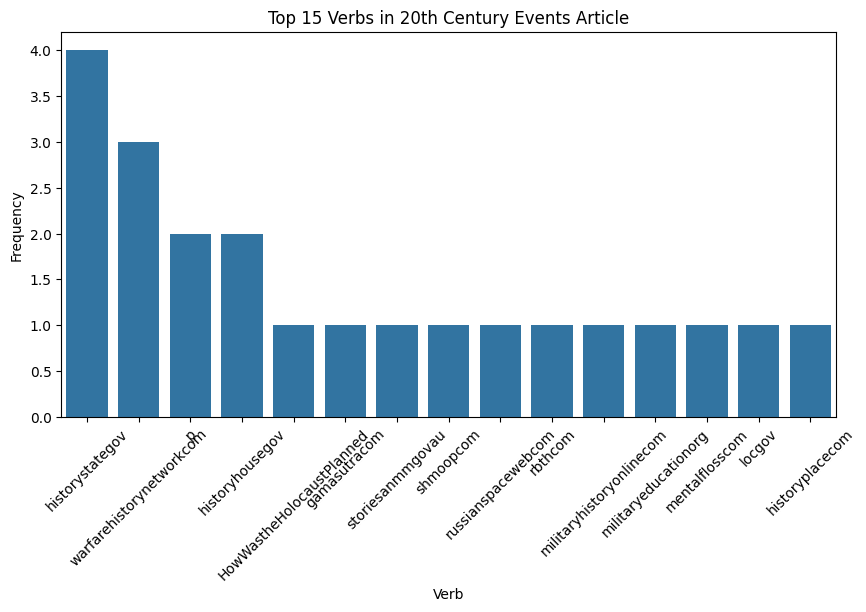

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Word",
    y="Frequency",
    data=top_15_verbs
)
plt.title("Top 15 Verbs in 20th Century Events Article")
plt.xticks(rotation=45)
plt.xlabel("Verb")
plt.ylabel("Frequency")
plt.show()

# Top Verbs

The verb frequency plot is dominated by source-related and reporting verbs, many of which are embedded in URLs or references (e.g., domains related to history or archives). This highlights that the text is not written in an expressive or action-driven style, but rather in a descriptive and referential tone.

The relatively low frequency values across verbs suggest that no single action dominates the narrative. Instead, the article functions more as a compiled historical overview, summarizing events rather than emphasizing processes or changes through strong verb usage.

In [32]:
df_adjs = df_tags[df_tags["POS_Tag"].isin(adj_tags)]

top_15_adjs = (
    df_adjs.groupby("Word")
    .count()
    .reset_index()
    .rename(columns={"POS_Tag": "Frequency"})
    .sort_values(by="Frequency", ascending=False)
    .head(15)
)

top_15_adjs

,Word,Frequency
0,TheGuardian,1
1,archivenordregiose,1
2,avalonlawyaleedu,1
3,deCastellaTomFebruary,1
4,firstworldwarcom,1
5,nationalarchivesgovuk,1
6,ntiorg,1
7,sawthecompletionofthePanamaCanal,1


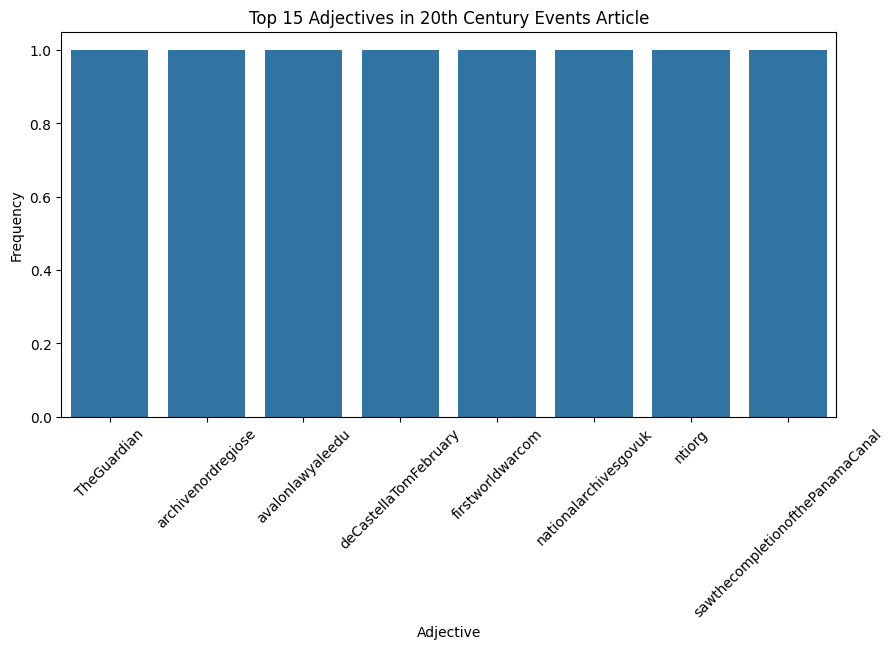

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Word",
    y="Frequency",
    data=top_15_adjs
)
plt.title("Top 15 Adjectives in 20th Century Events Article")
plt.xticks(rotation=45)
plt.xlabel("Adjective")
plt.ylabel("Frequency")
plt.show()

# Top Adjectives

The adjective frequency plot shows very low and uniform frequencies, with no single adjective standing out strongly. Many of the “adjectives” appear to be contextual labels or metadata-related terms rather than descriptive language.

This indicates that the article avoids subjective or emotionally loaded language and instead maintains a neutral, factual style, which is typical for historical summaries and encyclopedic content.

In [35]:
countries = [
    "United States",
    "United Kingdom",
    "Germany",
    "France",
    "Russia",
    "Soviet Union",
    "Japan",
    "China",
    "Italy",
    "Spain",
    "India",
    "Poland",
    "Austria",
    "Hungary",
    "Turkey"
]

In [37]:
text_string = " ".join(filtered_words).lower()

country_counts = {}
for country in countries:
    country_counts[country] = text_string.count(country.lower())

df_countries = pd.DataFrame(
    country_counts.items(),
    columns=["Country", "Times_Mentioned"]
)

df_countries = df_countries[df_countries["Times_Mentioned"] > 0]
df_countries = df_countries.sort_values(
    by="Times_Mentioned",
    ascending=False
).reset_index(drop=True)

df_countries

,Country,Times_Mentioned
0,Japan,69
1,Germany,41
2,Russia,18
3,France,17
4,Italy,14
5,Poland,13
6,China,12
7,India,12
8,Austria,5
9,Hungary,3


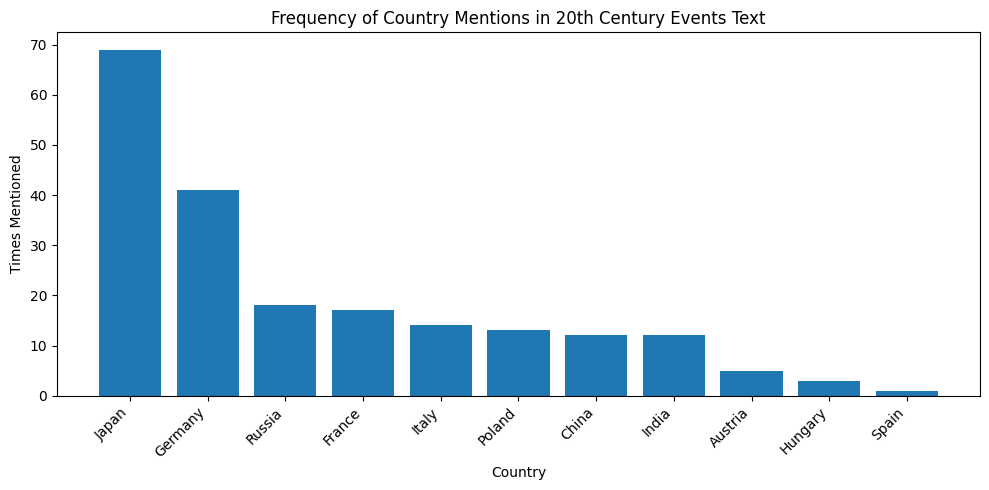

In [38]:
plt.figure(figsize=(10, 5))

plt.bar(
    df_countries["Country"],
    df_countries["Times_Mentioned"]
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Times Mentioned")
plt.title("Frequency of Country Mentions in 20th Century Events Text")

plt.tight_layout()
plt.show()

# The plot shows a highly uneven distribution of country mentions. Japan and Germany are mentioned far more often than other countries, highlighting their central role in major twentieth-century events, particularly global conflicts. Countries such as Russia and France appear moderately, while others are mentioned only a few times. Overall, the results indicate that the text focuses mainly on a small number of influential nations rather than providing balanced coverage across all countries.